# PRCP-1011-BLOOD DONATION PREDITION 

# PROBLEM STATEMENT

The goal is to develop a predictive model that can identify donors who are likely to donate blood again based on a limited set of attributes. This model will help blood donation centers to target potential repeat donors more effectively, ensuring a stable and sufficient blood supply.

# TASK 1: DATA ANALYSIS REPORT

## 1.DATA CLEANING

- Removing duplicates.
- Correcting data types.

## EXPLORATORY DATA ANALYSIS(EDA)

- Descriptive statistics.
- Data visualization (box plots).
- Correlation analysis.

## FEATURE ENGINEERING

- Creating new features.
- Transforming existing features.

# TASK 2:MODEL CREATION AND COMPARE WITH OTHER MODELS

#### WE ARE USING SIX MODELS FOR PREDICTION

- 1.LOGISTIC REGRESSION
- 2.SVM
- 3.RANDOM FOREST 
- 4.DECISION TREE 
- 5.GRAIDENT BOOST
- 6.XGBOOST

# TASK 1: DATA ANALYSIS RREPORT

### IMPORTING THE PYTHON LIBRARY

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [7]:
df = pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

### EXAMINE THE DATA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months since Last Donation   576 non-null    int64
 1   Number of Donations          576 non-null    int64
 2   Total Volume Donated (c.c.)  576 non-null    int64
 3   Months since First Donation  576 non-null    int64
 4   Made Donation in March 2007  576 non-null    int64
dtypes: int64(5)
memory usage: 22.6 KB


In [10]:
df.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

###  STATISTICAL MEASURE OF DATA

In [11]:
df.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [12]:
df.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [13]:
df.shape

(576, 5)

In [14]:
df['Made Donation in March 2007'].value_counts()

Made Donation in March 2007
0    438
1    138
Name: count, dtype: int64

### PLOT THE BARPLOT

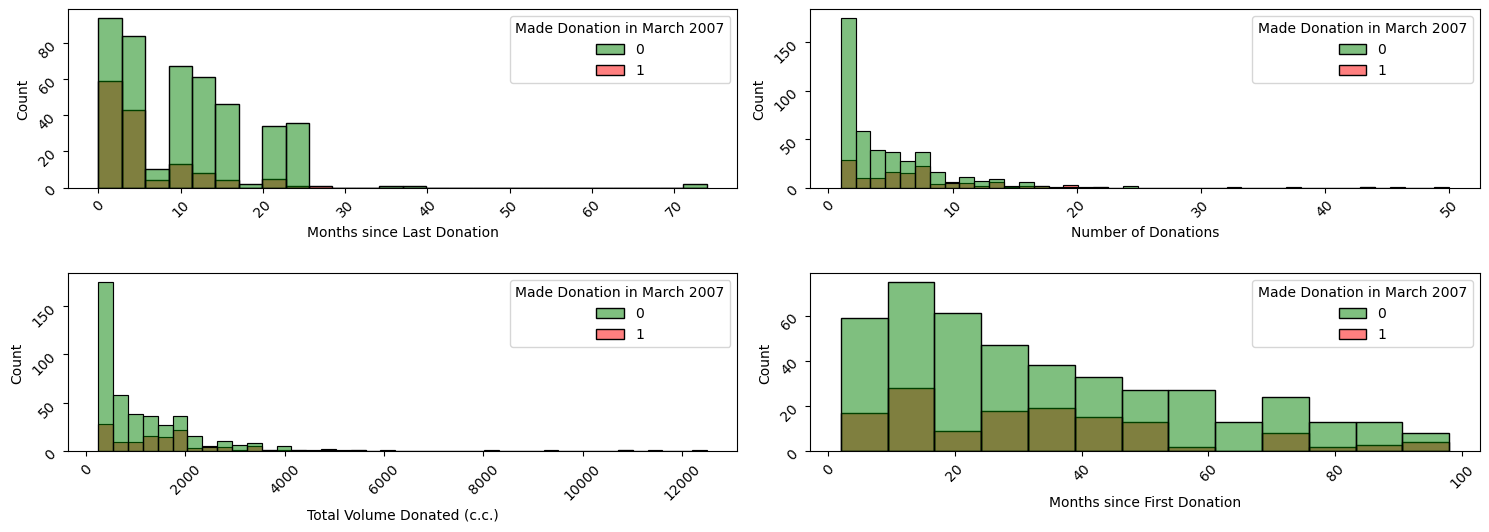

In [15]:
plt.figure(figsize=(15,10))
num = 1
for i in df.drop('Made Donation in March 2007', axis=1):
    plt.subplot(4,2,num)
    sns.histplot(x=i, data=df, hue='Made Donation in March 2007',
                palette={0: 'g', 1:'r'})
    num += 1
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# FEATURE SELECTION 

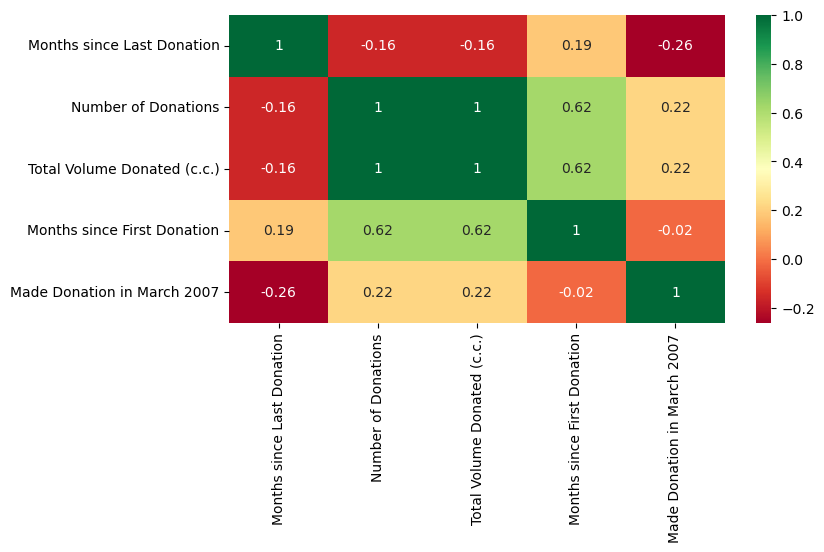

In [16]:
cor = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor, annot=True, cmap='RdYlGn')
plt.show()

In [17]:
cor = abs(df.corr()['Made Donation in March 2007'])
pd.DataFrame(cor).sort_values('Made Donation in March 2007', ascending=False).iloc[1:, :]

,Made Donation in March 2007
Months since Last Donation,0.261234
Number of Donations,0.220615
Total Volume Donated (c.c.),0.220615
Months since First Donation,0.019819


# SPLIT THE X AND Y DATASETS

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=16,test_size=0.2)

# LOGISTIC REGRESSION 

In [27]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_hat = model1.predict(X_test)

In [28]:
pd.Series(y_hat).value_counts()

0    108
1      8
Name: count, dtype: int64

In [29]:
y_train.value_counts()

Made Donation in March 2007
0    348
1    112
Name: count, dtype: int64

In [30]:
pd.crosstab(y_test,y_hat)

col_0,0,1
Made Donation in March 2007,,
0,87,3
1,21,5


# ACCURACY SCORE OF LOGISTIC REGRESSION MODEL

In [87]:
print('TRAINING ACCURACY  :',accuracy_score(y_test,y_hat)*100)
print('CLASSIFICATION REPORT:',classification_report(y_test,y_hat))
print('CONFUSION MATRIX  :',confusion_matrix(y_test,y_hat))

TRAINING ACCURACY  : 79.3103448275862
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.81      0.97      0.88        90
           1       0.62      0.19      0.29        26

    accuracy                           0.79       116
   macro avg       0.72      0.58      0.59       116
weighted avg       0.77      0.79      0.75       116

CONFUSION MATRIX  : [[87  3]
 [21  5]]


#  USING BAGGING ON LOGISTIC REGRESSION MODEL

In [24]:
# Step 1: Create a logistic regression object for bagging
log_bag = LogisticRegression()
# Step 2: Give the parameter in baggingclassifier
bagg = BaggingClassifier(base_estimator=log_bag,n_estimators=100,max_samples=0.8,oob_score=True,random_state=0)
# Step:3 fitting the Training data
bagg.fit(X_train,y_train)
# Step 4: prediction on test data
bagg_predict = bagg.predict(X_test)

# ACCURACY SCORE OF LOGISTIC REGRESSION MODEL USING BAGGING

In [88]:
print('TRAINING ACCURACY :',accuracy_score(y_test,bagg_predict)*100)
print('CLASSIFICATION REPORT :',classification_report(y_test,bagg_predict))
print('CONFUSION MATRIX :',confusion_matrix(y_test,bagg_predict))

TRAINING ACCURACY : 79.3103448275862
CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.81      0.97      0.88        90
           1       0.62      0.19      0.29        26

    accuracy                           0.79       116
   macro avg       0.72      0.58      0.59       116
weighted avg       0.77      0.79      0.75       116

CONFUSION MATRIX : [[87  3]
 [21  5]]


# USING SMOTE IN BALANCING THE DATASET 

In [33]:
sm = SMOTE(random_state=16)
x_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [30]:
y_train.value_counts()

Made Donation in March 2007
0    348
1    112
Name: count, dtype: int64

In [31]:
y_train_smote.value_counts()

Made Donation in March 2007
0    348
1    348
Name: count, dtype: int64

In [34]:
model2 = LogisticRegression()
model2.fit(x_train_smote, y_train_smote)
y_pred_smote = model2.predict(X_test)

# ACCURACY SCORE OF LOGISTIC REGRESSION MODEL USING SMOTE

In [36]:
print('TRAINING ACCURACY:',accuracy_score(y_test,y_pred_smote)*100)
print('CLASSIFICATION REPORT:',classification_report(y_test,y_pred_smote))
print('CONFUSION MATRIX:',confusion_matrix(y_test,y_pred_smote))

TRAINING ACCURACY OF LOGISTIC REGRESSION USING SMOTE IS : 76.72413793103449
CLASSIFICATION REPORT OF  LOGISTIC REGRESSION USING SMOTE IS :               precision    recall  f1-score   support

           0       0.94      0.74      0.83        90
           1       0.49      0.85      0.62        26

    accuracy                           0.77       116
   macro avg       0.72      0.80      0.73       116
weighted avg       0.84      0.77      0.78       116

CONFUSION MATRIX OF  LOGISTIC REGRESSION USING SMOTE IS : [[67 23]
 [ 4 22]]


# USING SMOTE IN HYPER PARAMETER TUNING FOR LOGSTRIC REGRESSION

In [36]:
# Parameters of Logistic Regression to be tuned
best_param = {
    'fit_intercept': [True, False],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'random_state': [i for i in range(1,43)],
    'solver': ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky', 'sag', 'saga']
            }

In [22]:
model_smote = LogisticRegression()
grid_search = GridSearchCV(model_smote, best_param, cv=3,verbose=3, scoring='f1')
grid_search.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 1512 candidates, totalling 4536 fits
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=1, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=1, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=1, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=1, solver=n

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 3/3] END fit_intercept=True, penalty=l1, random_state=1, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=2, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=2, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=2, solver=liblinear;, score=0.691 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=2, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=T

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 3/3] END fit_intercept=True, penalty=l1, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=3, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=3, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=3, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 2/3] END fit_intercept=True, penalty=l1, random_state=4, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=4, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=4, solver=sag;, score=nan total time=   0.0s
[CV

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 3/3] END fit_intercept=True, penalty=l1, random_state=6, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=7, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=7, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=7, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=7, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=7, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=T

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=8, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=8, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=8, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=8, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=8, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=8, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=8, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=8, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=8, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=T

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV 2/3] END fit_intercept=True, penalty=l1, random_state=9, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=9, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=9, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=9, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=9, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=10, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=10, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=10, solver=liblinear;, score=0.691 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=10, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=11, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=11, solver=liblinear;, score=0.691 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=11, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 2/3] END fit_intercept=True, penalty=l1, random_state=12, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=12, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=12, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=12, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=12, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=12, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=12, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=12, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=12, solver=sag;, score=nan total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l1, random_state=13, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=13, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=13, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=13, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=13, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=13, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=13, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=13, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=13, solver=sag;, score=nan total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=14, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=14, solver=liblinear;, score=0.691 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=14, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=14, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=14, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=14, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV 3/3] END fit_intercept=True, penalty=l1, random_state=15, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=15, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=15, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=15, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=15, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=15, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=15, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=15, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=15, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=17, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=17, solver=liblinear;, score=0.691 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=17, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=17, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=17, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=17, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=17, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=17, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=17, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 2/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=18, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=18, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=18, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=18, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=19, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=19, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=19, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=19, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=19, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=19, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=20, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=20, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=20, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 3/3] END fit_intercept=True, penalty=l1, random_state=22, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=22, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=22, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 3/3] END fit_intercept=True, penalty=l1, random_state=23, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=24, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=24, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=24, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=24, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=24, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=24, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=24, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=24, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=25, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=25, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=25, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 2/3] END fit_intercept=True, penalty=l1, random_state=27, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=27, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=27, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=27, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=27, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=27, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=27, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=27, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=28, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=Tr

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=28, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=28, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=28, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=28, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=28, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=28, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=28, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=28, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=28, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 2/3] END fit_intercept=True, penalty=l1, random_state=29, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=29, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=30, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=30, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=30, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=30, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=30, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=30, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=30, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=30, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=30, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=30, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=31, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=31, solver=liblinear;, score=0.691 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=31, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 2/3] END fit_intercept=True, penalty=l1, random_state=31, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=31, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=32, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=32, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=32, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=32, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=32, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=32, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=32, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=33, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=33, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=33, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=33, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=33, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=33, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=33, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=33, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=33, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 3/3] END fit_intercept=True, penalty=l1, random_state=34, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=34, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=34, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=34, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=34, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=34, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=34, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=34, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=34, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 2/3] END fit_intercept=True, penalty=l1, random_state=35, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=35, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=36, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=36, solver=liblinear;, score=0.691 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=36, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=36, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=36, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=37, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=37, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=37, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=37, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=37, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=37, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=37, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=37, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=37, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=37, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=37, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=37, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=38, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=38, solver=liblinear;, score=0.680 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 3/3] END fit_intercept=True, penalty=l1, random_state=38, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=38, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=38, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=38, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=38, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=38, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=39, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=39, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=39, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=39, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=39, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=39, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV 1/3] END fit_intercept=True, penalty=l1, random_state=40, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=40, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=40, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=40, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=40, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=40, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=40, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=40, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=40, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 3/3] END fit_intercept=True, penalty=l1, random_state=41, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=42, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=42, solver=liblinear;, score=0.691 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=42, solver=liblinear;, score=0.751 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=1, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=1, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=1, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=1, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=1, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=1, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=1, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=1, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=1, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=1, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=1, solver=sag;, score=0.740 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=1, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=1, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=1, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, r

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=newton-cg;, score=0.683 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=sag;, score=0.744 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=3, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=3, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=3, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=3, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=3, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=3, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=T

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=4, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=4, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=4, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=4, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=4, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=4, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=4, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=4, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=4, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=5, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=5, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=5, solver=newton-cholesky;, score=0.648 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=5, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=sag;, score=0.740 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=5, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=saga;, score=0.699 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=6, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=6, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=newton-cg;, score=0.683 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=6, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=6, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=6, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] EN

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=7, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=7, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=7, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=7, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=7, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=7, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=7, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=7, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=7, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] EN

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=8, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=8, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=8, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=8, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=8, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=8, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=8, solver=sag;, score=0.740 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=8, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=8, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] EN

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=9, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=9, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=9, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=9, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=9, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=9, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=9, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=9, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=9, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] EN

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=10, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=10, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=10, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=10, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=10, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=10, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=10, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=10, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=10, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=11, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=11, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=11, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=11, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=11, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=11, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=11, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=11, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=11, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=12, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=12, solver=sag;, score=0.740 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=12, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=12, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=12, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=13, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=13, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=13, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=13, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=13, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=14, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=14, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=14, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=14, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=14, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=14, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=14, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=14, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=14, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=14, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=14, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=14, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=15, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=15, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=15, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=15, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=15, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=15, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=15, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=15, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=15, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=15, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=15, solver=saga;, score=0.657 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=15, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=15, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=16, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=16, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=16, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=16, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=16, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=16, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=16, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END f

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=17, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cg;, score=0.683 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=17, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=17, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=18, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=18, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=18, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=18, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=18, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=18, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=18, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=18, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=18, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=19, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=19, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=20, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=20, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=20, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=20, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=20, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=20, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=20, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END f

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cg;, score=0.683 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=sag;, score=0.740 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=22, solver=sag;, score=0.740 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=22, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=22, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=22, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=23, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=23, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=23, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=23, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=23, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=23, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=23, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=23, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=23, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=23, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=23, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=24, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=24, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=24, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, pena

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=24, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=24, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=24, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=24, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=24, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=24, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=24, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=24, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=24, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=25, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=25, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=25, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=25, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=25, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=25, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=26, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=26, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=26, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, pena

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=26, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=26, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=27, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=27, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=27, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=27, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=27, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=27, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=27, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END f

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=27, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=27, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=27, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=28, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=28, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=28, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=28, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=28, solver=saga;, score=0.681 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=newton-cg;, score=0.683 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=saga;, score=0.681 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=30, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=30, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=30, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=30, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=30, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=30, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=30, solver=sag;, score=0.740 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=30, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=30, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=31, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=31, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=31, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, pena

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=31, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=31, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=31, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=31, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=31, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=31, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=31, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=31, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=31, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=32, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=32, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=32, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=32, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=32, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=32, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=32, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=32, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=32, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=33, solver=newton-cg;, score=0.756 total time=   0.1s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=33, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=33, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=33, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=33, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=33, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=33, solver=sag;, score=0.744 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=33, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=33, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=33, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=34, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=34, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=34, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=34, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=34, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=34, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=34, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=34, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=34, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=34, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=34, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=34, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=35, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=35, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=35, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, pena

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=35, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=35, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=35, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=35, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=35, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=35, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=36, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=36, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=36, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, pena

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=36, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=36, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=36, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=36, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=36, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=36, solver=saga;, score=0.681 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=36, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=37, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=37, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=37, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=37, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=37, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=37, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=37, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=37, solver=newton-cg;, score=0.683 total time=   0.0s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=38, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=38, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=38, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=38, solver=liblinear;, score=0.680 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=38, solver=liblinear;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=38, solver=newton-cg;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=38, solver=newton-cg;, score=0.683 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=38, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=38, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=38, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=38, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=38, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=38, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=38, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=38, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=38, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=39, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=39, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=39, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=39, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=39, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=39, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=39, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=39, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=39, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=40, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=40, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=40, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=40, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=40, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=40, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=40, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=40, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=40, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=41, solver=newton-cg;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=41, solver=newton-cholesky;, score=0.648 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=41, solver=newton-cholesky;, score=0.683 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=41, solver=newton-cholesky;, score=0.756 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=41, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=41, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=41, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=41, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=41, solver=saga;, score=0.681 total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=42, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=newton-cg;

[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=8, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=8, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=8, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=8, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=8, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=8, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=8, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=8, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_stat

[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=13, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=13, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=13, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=13, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=13, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=14, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=14, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=14, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=14, solver=liblinear;, score=

[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=ela

[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=26, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=26, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=26, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=26, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=26, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=26, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=27, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=27, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=27, solver=lbfgs;, score=nan to

[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=30, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=30, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=31, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=31, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=31, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=31, solver=n

[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=35, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=35, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=35, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=35, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=35, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=35, solver=liblin

[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=40, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=40, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=40, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=41, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=41, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=41, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=41, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=41, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=41, solver=liblin

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=1, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=1, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 1/3] END fit_intercept=False, penalty=l1, random_state=4, solver=liblinear;, score=0.672 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=4, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=4, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=4, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=4, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=4, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=5, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=5, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=5, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV 1/3] END fit_intercept=False, penalty=l1, random_state=6, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=6, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=6, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=7, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=7, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=7, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=8, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=8, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=8, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=9, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=9, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=9, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=9, solver=liblinear;, score=0.672 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=9, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=9, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=10, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=10, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=10, solver=sag;, score=nan total time= 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 1/3] END fit_intercept=False, penalty=l1, random_state=13, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=13, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=13, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=14, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=15, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=15, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=15, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=15, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=15, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=15, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=15, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=15, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 2/3] END fit_intercept=False, penalty=l1, random_state=16, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=16, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=16, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=16, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=16, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=16, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=16, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=16, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=16, solver=sag;, score=nan tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=17, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=17, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=17, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=17, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=17, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=17, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=17, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=18, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=18, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=Fal

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 2/3] END fit_intercept=False, penalty=l1, random_state=19, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=19, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=19, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=19, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=19, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=19, solver=sag;, score=nan tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=20, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=21, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=21, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=21, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=21, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=21, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=21, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=21, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=21, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=22, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=22, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=22, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=22, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=22, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=22, solver=sag;, score=nan total time= 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV 1/3] END fit_intercept=False, penalty=l1, random_state=25, solver=liblinear;, score=0.672 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=25, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=25, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=25, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=25, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=25, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=25, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=26, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=26, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=26, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=26, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=26, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=26, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=27, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=27, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=27, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=27, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=27, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=27, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=27, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=27, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 1/3] END fit_intercept=False, penalty=l1, random_state=28, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=28, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=28, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=28, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=28, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=28, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=28, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=28, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=28, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=29, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=29, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=29, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=29, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=29, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=29, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=29, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=30, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=30, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=Fal

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=30, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=31, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=31, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=31, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=31, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=31, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV 1/3] END fit_intercept=False, penalty=l1, random_state=32, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=32, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=32, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=32, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=32, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=32, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=32, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=32, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=32, solver=sag;, score=nan total time=   0.0s
[

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 2/3] END fit_intercept=False, penalty=l1, random_state=33, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=33, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=34, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=34, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=34, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=34, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=34, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=34, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=34, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 2/3] END fit_intercept=False, penalty=l1, random_state=35, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=35, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=35, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=35, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=35, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=35, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=35, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=35, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_int

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=36, solver=liblinear;, score=0.672 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=36, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=36, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=36, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=36, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=36, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=36, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=36, solver=newton-cholesky;, score=nan total 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

[CV 1/3] END fit_intercept=False, penalty=l1, random_state=37, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=37, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=37, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=38, solver=liblinear;, score=0.672 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=38, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=38, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=38, solver=sag;, score=nan tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 2/3] END fit_intercept=False, penalty=l1, random_state=39, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=39, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=39, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=39, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=39, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=39, solver=sag;, score=nan tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=40, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=40, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=40, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=40, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=40, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=40, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=40, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=40, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=40, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

[CV 3/3] END fit_intercept=False, penalty=l1, random_state=40, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=41, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=41, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=41, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=41, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=41, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=41, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=41, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=41, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=42, solver=liblinear;, score=0.672 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=42, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=42, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=1, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=1, solver=newton-cg;, score=0.758 total time=   0.1s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=1, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=1, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=1, solver=newton-cholesky;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=1, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=1, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=1, solver=sag;, score=0.740 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=1, solver=saga;, score=0.657 total time=   0.

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=2, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=2, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cholesky;, score

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=3, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=3, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=3, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=3, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=3, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=3, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=3, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=3, solver=newton-cholesky;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=3, solver=sag;, score=0.692

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cholesky;, score=0.758 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=4, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=4, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=4, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=4, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=4, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=4, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=5, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=5, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=5, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, pen

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=6, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=6, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=6, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=6, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=6, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=6, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=6, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=6, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=6, solver=newton-cholesky;, score=0.661 total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=7, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=7, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=7, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=7, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=7, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=7, solver=newton-cholesky;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=7, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=7, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=7, solver=sag;, score=0.744 total time=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=7, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=7, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=8, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=8, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=8, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=8, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=8, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=8, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=8, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END f

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=8, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=9, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=9, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=9, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=9, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=9, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=9, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=9, solver=newton-cg;, score=0.661 total time=   0.1s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=9, solver=newton-cg;, score=0.696 total time=   0.1s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=9, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=10, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=10, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=10, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=10, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=10, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=10, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=10, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=10, solver=newton-cg;, score=0.696 total time=   0.0s
[

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=11, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=11, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=11, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cholesk

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=sag;, score=0.740 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=13, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=13, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=13, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=13, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=13, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=13, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=13, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=13, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=13, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=14, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=14, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=14, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=15, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=15, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=15, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=15, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=15, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=15, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=15, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=15, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=15, solver=newton-cg;, score=0.758 total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=15, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=15, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=15, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=15, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=15, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=15, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=16, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=16, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=16, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=16, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=16, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=16, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=17, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=17, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=17, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=17, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=17, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=17, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=17, solver=sag;, score=0.742 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=17, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=17, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=17, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=18, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=18, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=18, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=18, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=18, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=19, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=19, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=19, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=19, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=19, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=19, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=19, solver=newton-cholesky;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=19, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=19, solver=sag;, score=0.

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cholesky;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=20, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=20, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=20, solver=sag;, score=0.742 to

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=21, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=21, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=21, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=21, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=21, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=21, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=21, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=21, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=21, solver=newton-cg;, score=0.758 total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=22, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=22, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=22, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=22, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=22, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=22, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=22, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=22, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=22, solver=newton-cg;, score=0.758 total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=22, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=22, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=22, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=23, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=23, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=23, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=23, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=23, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=23, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=24, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=24, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=24, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=24, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=24, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=24, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=24, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=24, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=24, solver=newton-cg;, score=0.758 total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=25, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=25, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=25, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=25, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=25, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=25, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=25, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=25, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=25, solver=newton-cholesky;, score=0.661 tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=26, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=26, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=26, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=26, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=26, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=26, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=26, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=26, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=26, solver=newton-cg;, score=0.758 total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=27, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=27, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=27, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=27, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=27, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=27, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=27, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=27, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=27, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=28, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=28, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=28, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=28, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=28, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=28, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=28, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=28, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=28, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=29, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=29, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=29, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=29, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=29, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=29, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=29, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=29, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=29, solver=newton-cg;, score=0.758 total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=30, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=30, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=30, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=30, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=30, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=30, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=30, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=30, solver=newton-cg;, score=0.758 total time=   0.1s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=30, solver=newton-cholesky;, score=0.661 tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=31, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=31, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=31, solver=newton-cg;, score=0.758 total time=   0.1s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=31, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=31, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=31, solver=newton-cholesky;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=31, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=31, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=31, solver=sag;, score=0.742 to

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=32, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=32, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=32, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=32, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=32, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=32, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=32, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=32, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=32, solver=newton-cg;, score=0.758 total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=32, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=32, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=32, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=32, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=33, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=33, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=33, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=33, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=33, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=33, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=34, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=34, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=34, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=34, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=34, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=34, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=34, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=34, solver=newton-cg;, score=0.696 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=34, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=34, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=34, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=34, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=35, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=35, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=35, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=35, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=35, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=36, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=36, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=36, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=36, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=36, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=36, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=36, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=36, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=36, solver=newton-cholesky;, score=0.661 tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=37, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=37, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=37, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=37, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=37, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=37, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=37, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=37, solver=newton-cholesky;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=37, solver=sag;, sc

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=38, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=38, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=38, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=38, solver=newton-cg;, score=0.661 total time=   0.1s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=38, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=38, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=38, solver=newton-cholesky;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=38, solver=newton-cholesky;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=38, solver=newton-cholesk

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=39, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cg;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cholesky;, score=0.661 tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=39, solver=sag;, score=0.692 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=sag;, score=0.709 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=sag;, score=0.744 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=39, solver=saga;, score=0.657 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=40, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=40, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=40, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=40, solver=saga;, score=0.681 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=40, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=41, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=41, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=41, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=41, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=41, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=41, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=41, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=41, solver=saga;, score=0.699 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=42, solver=lbfgs;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=42, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=42, solver=lbfgs;, score=0.758 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=42, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=42, solver=liblinear;, score=0.698 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=42, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=42, solver=newton-cg;, score=0.661 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=42, solver=newton-cg;, score=0.696 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=2, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_sta

[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=6, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=6, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=6, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=6, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=6, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=6, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=6, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=6, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, pena

[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=11, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=11, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=11, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=11, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=11, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=11, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=11, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=11, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, rand

[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=16, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=16, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=16, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=16, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=16, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=17, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=17, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=17, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=17, solver=liblinear

[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=21, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=22, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=22, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=22, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=22, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=22, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=22, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_stat

[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=25, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=25, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=25, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=26, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=26, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=26, solv

[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=30, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_stat

[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=37, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=37, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=37, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=37, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=37, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=37, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=37, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=37, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elas

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2520 fits failed out of a total of 4536.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
252 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_l

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1', verbose=3)

In [23]:
# Get best parameters
grid_search.best_params_

{'fit_intercept': True, 'penalty': 'l2', 'random_state': 2, 'solver': 'sag'}

In [37]:
model_smote=LogisticRegression(fit_intercept=True, penalty='l2', random_state=2, solver='sag', max_iter=200)
model_smote.fit(x_train_smote,y_train_smote)  
y_hat3 = model_smote.predict(X_test) 

# ACCURACY SCORE OF LOGISTIC REGRESSION MODEL USING SMOTE IN HP TUNING

In [38]:
print('TRAINING ACCURACY:',accuracy_score(y_test,y_pred_smote)*100)
print('CLASSIFICATION REPORT:',classification_report(y_test,y_pred_smote))
print('CONFUSION MATRIX :',confusion_matrix(y_test,y_pred_smote))

TRAINING ACCURACY OF LOGISTIC REGRESSION USING HP TUNING SMOTE IS : 76.72413793103449
CLASSIFICATION REPORT OF  LOGISTIC REGRESSION USING HP TUNING SMOTE IS :               precision    recall  f1-score   support

           0       0.94      0.74      0.83        90
           1       0.49      0.85      0.62        26

    accuracy                           0.77       116
   macro avg       0.72      0.80      0.73       116
weighted avg       0.84      0.77      0.78       116

CONFUSION MATRIX OF  LOGISTIC REGRESSION USING HP TUNING SMOTE IS : [[67 23]
 [ 4 22]]


# USING CLASS WEIGHT FOR HYPERPARAMETER TUNING IN LOGISTIC REGRESSION 

In [45]:
model = LogisticRegression(class_weight={0:2.5,1:1})
grid_search = GridSearchCV(model, best_param, cv=3,verbose=3, scoring='f1')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1512 candidates, totalling 4536 fits
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=1, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=1, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=1, solver=n

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=2, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=2, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=2, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=2, solver=newton-cholesky;, score=nan total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=2, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=2, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=2, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=2, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=2, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=2, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=3, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=3, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=3, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=3, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=3, solver=newton-cholesky;, score=nan total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=4, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=4, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=4, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=4, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=4, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=4, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=4, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=4, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=5, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=5, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=5, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=5, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=5, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=5, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, p

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=5, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=6, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=6, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=6, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=6, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=6, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=6, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=6, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=6, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=T

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=7, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=7, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=7, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, p

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=8, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=8, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=8, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=9, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=9, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=9, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=10, solver=liblinear;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l1, random_state=10, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=10, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=10, solver=sag;, score=nan total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l1, random_state=11, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=11, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=11, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=11, solver=sag;, score=nan total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=11, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=12, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=12, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=12, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=12, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=12, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=12, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=12, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=12, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=12, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=12, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=12, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=13, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=13, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=13, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=13, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=13, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=13, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=14, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=14, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=14, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=14, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=14, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=14, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=15, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=15, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=15, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=15, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=15, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=15, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=15, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=16, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=16, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=16, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=16, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=16, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=16, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=16, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=16, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=17, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=17, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=17, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=17, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=17, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=17, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=18, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=18, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=18, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=18, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=19, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=19, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=19, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=19, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=19, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=19, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=19, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=20, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=20, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=20, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=21, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=21, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=21, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=22, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=22, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=22, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, rand

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=22, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=22, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=22, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=22, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=22, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=23, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=23, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=23, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=23, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=23, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=23, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=23, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=23, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=23, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l1, random_state=23, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=23, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=24, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=24, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=24, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=24, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=24, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=24, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=24, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=25, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=25, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=25, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=25, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=25, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=25, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=25, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=26, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=26, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=26, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=27, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=27, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=27, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=27, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=27, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=27, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=27, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=27, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=27, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l1, random_state=27, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=27, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=28, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=28, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=28, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=28, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=28, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=28, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=28, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=28, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=29, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=29, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=29, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=29, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=29, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=29, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=29, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=29, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=30, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=30, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=30, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=30, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=30, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=30, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=30, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=30, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=30, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=30, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=31, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=31, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=31, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=31, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=31, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l1, random_state=31, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=31, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=31, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=31, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=31, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=32, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=32, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=32, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=32, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=32, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=33, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=33, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=33, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=33, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=33, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=33, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=33, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=33, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=33, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=33, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=33, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=34, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=34, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=34, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=34, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=34, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=34, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=34, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=34, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=34, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=35, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=35, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=35, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=35, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=35, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=35, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=35, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=36, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=36, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=36, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=36, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=36, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=36, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=36, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=36, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=37, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=37, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=37, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=37, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=37, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=37, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=37, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=37, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=37, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=38, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=38, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=38, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l1, random_state=38, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=38, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=39, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=39, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=39, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=39, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=39, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=39, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l1, random_state=39, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=39, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=40, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=40, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=40, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=40, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=40, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=40, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=40, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l1, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=42, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=42, solver=liblinear;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l1, random_state=42, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l1, random_state=42, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l1, random_state=42, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l1, random_state=42, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=1, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=1, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=1, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=1, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=1, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=1, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=1, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=1, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 1/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 1/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=2, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=2, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=2, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=3, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=3, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=3, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=3, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=3, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=3, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=3, solver=newton-cg;, score=0.136 total time=   0.2s
[CV 2/3] END fit_interc

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=4, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=4, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=4, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=4, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=4, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=4, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=4, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=4, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=4, solver=newton-cg;, score=0.053 total time=   0.0s
[CV 1/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=4, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=4, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=4, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=4, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=5, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=5, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=5, solver=newton-cg;, score=0.136 total time=   0.2s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 1/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=5, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=5, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=5, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=6, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=6, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_i

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=7, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=7, solver=lbfgs;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=7, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=7, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=7, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=7, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=7, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=7, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=7, solver=newton-cg;, score=0.053 total time=   0.2s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=7, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=7, solver=newton-cholesky;, score=0.000 total time= 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=7, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=7, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=7, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=8, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=8, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=8, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=8, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=8, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=8, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=8, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=8, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=8, solver=newton-cg;, score=0.053 total time=   0.0s
[CV 1/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=9, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=9, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=9, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=9, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=9, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=9, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=T

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=10, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=10, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=10, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=10, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=10, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=10, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=10, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=10, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=10, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=10, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=11, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=11, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=11, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=11, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=11, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=11, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=11, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=11, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=11, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=11, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=12, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=12, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=12, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=12, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=12, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=12, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=12, solver=newton-cg;, score=0.136 total time=   0.3s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=12, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=12, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=12, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=12, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=12, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=13, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=13, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=13, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=13, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=13, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=13, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=13, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=13, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=14, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=14, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=14, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=14, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=14, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=14, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=14, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=14, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=15, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=15, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=15, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=15, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=15, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=15, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=15, solver=newton-cg;, score=0.136 total time=   0.2s
[CV 2/3] END f

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=15, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=15, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=15, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=15, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=16, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=16, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=16, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=16, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=16, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=16, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=16, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=16, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=16, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=17, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=lbfgs;, score=0.053 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=17, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cg;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=newton-cholesky;, score

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=17, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=18, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=18, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=18, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=18, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=18, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=18, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=18, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=18, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=18, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=18, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=19, solver=lbfgs;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=19, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=19, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=19, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=19, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=19, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=19, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=19, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=19, solver=newton-cg;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=19, solver=newton-cholesky;, score=0.136 total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=19, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=19, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=19, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=19, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=19, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=20, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=20, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=20, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=20, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=20, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=20, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=20, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=20, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=lbfgs;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cg;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=newton-cholesky;, score=0.000 tot

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=21, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=22, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=22, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=22, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=22, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=22, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=22, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=22, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END f

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=22, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=22, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=22, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=22, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=22, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=22, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=23, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=23, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=23, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, pena

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=23, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=24, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=24, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=24, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=24, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=24, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=24, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=24, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=24, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=24, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=24, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=24, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=24, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=25, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=25, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=25, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=25, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=25, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=25, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=25, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=25, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=25, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=26, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=26, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=26, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=26, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=26, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=26, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=26, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=26, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=26, solver=newton-cg;, score=0.053 total time=   0.0s
[CV 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=26, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=26, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=27, solver=lbfgs;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=27, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=27, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=27, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=27, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=27, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=27, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=27, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=27, solver=newton-cg;, score=0.053 total time=   0.2s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=27, solver=newton-cholesky;, score=0.136 total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=27, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=27, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=27, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=27, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=27, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=lbfgs;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=28, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=28, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=newton-cg;, score=0.136 total time=   0.2s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=28, solver=newton-cg;, score=0.000 total time=   0.3s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=newton-cholesky;, score=0.136 total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=28, solver=saga;, score=0.000 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=28, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=28, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=29, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=29, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=29, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=30, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=30, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=30, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=30, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END f

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=30, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=30, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=30, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=30, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=30, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=31, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=31, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=31, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=31, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=31, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=31, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=31, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=31, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=31, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=32, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=32, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=32, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=32, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=32, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=32, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=32, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=32, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=32, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=32, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=32, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=32, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=True, penalty=l2, random_state=32, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=33, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=33, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=33, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=33, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=33, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=33, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=33, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=33, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=33, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=34, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=34, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=34, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=34, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=34, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=34, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=34, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=34, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=34, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=34, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=34, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=35, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=35, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=35, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=35, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=35, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=35, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=35, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=35, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=36, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=36, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=36, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=36, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=36, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=36, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=36, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END f

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=36, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=36, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=36, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=36, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=36, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=37, solver=lbfgs;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=37, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=37, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=37, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=37, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=37, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=37, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=37, solver=newton-cg;, score=0.000 total time=   0.2s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=37, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=37, solver=newton-cholesky;, score=0.136 total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=True, penalty=l2, random_state=37, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=38, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=38, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=38, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=38, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=38, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=38, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=38, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=38, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=True, penalty=l2, random_state=39, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=39, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=39, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=39, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=39, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=39, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=39, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=39, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=39, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=True, penalty=l2, random_state=39, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=39, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=40, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=40, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=40, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=40, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=40, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=40, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=40, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END f

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=40, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=40, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=40, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=40, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=40, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=41, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=41, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=41, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=41, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=41, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=41, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=41, solver=newton-cg;, score=0.136 total time=   0.1s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=41, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=41, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=l2, random_state=41, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=41, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=41, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=42, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=42, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=42, solver=lbfgs;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=42, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=42, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=42, solver=liblinear;, score=0.053 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=l2, random_state=42, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=42, solver=newton-cg;, score=0.000 total time=   0.1s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=42, solver=newton-cg;, score=0.053 total time=   0.1s
[CV 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=True, penalty=l2, random_state=42, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=l2, random_state=42, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=l2, random_state=42, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=liblinear;, score=nan total ti

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=1, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=2, solver=lbfgs;, s

[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=5, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=6, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=6, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=6, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=6, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=6, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=6, solver=liblinear;, sco

[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=10, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=10, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=10, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticne

[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=14, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=15, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=15, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=15, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=15, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=15, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=15, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=15, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=15, sol

[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=19, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=19, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=19, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=19, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=19, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=19, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=19, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=20, solver=lbfgs;, sc

[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=24, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=24, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=24, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=25, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=25, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=25, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=25, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=25, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=25, solver=liblin

[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=29, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=29, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=29, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=29, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=29, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=29, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=29, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=29, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, r

[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=33, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=34, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=34, sol

[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=38, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=38, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticnet, random_state=38, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=True, penalty=elasticnet, random_state=38, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=True, penalty=elasticnet, random_state=38, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=True, penalty=elasticne

[CV 1/3] END fit_intercept=False, penalty=l1, random_state=1, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=1, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=2, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=2, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=2, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=2, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=2, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=2, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=3, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=3, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=3, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=3, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=3, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=3, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=3, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=3, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=4, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=4, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=4, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=4, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=4, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=4, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=4, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=5, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=5, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=5, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=5, solver=sag;, score=nan total time=   0.0s
[C

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=6, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=6, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=6, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=6, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=6, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=6, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=6, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=6, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=6, solver=newton-cholesky;, score=nan total

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=7, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=7, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=7, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=7, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=7, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=7, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=8, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=8, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=8, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=8, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=8, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=8, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=8, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=8, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=9, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=9, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=9, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=9, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=9, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=9, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=9, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=9, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=10, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=10, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=10, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fi

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=10, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=10, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=10, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=11, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=11, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=11, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=11, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=11, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=11, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=12, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=12, solver=liblinear;, score=0.000 total time=   0.2s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=12, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=12, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=12, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=12, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=12, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=12, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=12, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=13, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=13, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=13, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=13, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=14, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=14, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=14, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=14, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=14, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=14, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=15, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=15, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=15, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=15, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=15, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=15, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=15, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=15, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=15, solver=newton-cholesky;, score=nan total time=   0.

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=16, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=16, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=16, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=16, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=16, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=16, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=16, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=16, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=16, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=17, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=17, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=17, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=17, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=17, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=17, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=17, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=17, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=18, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=18, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=18, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=18, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=18, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=18, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=18, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=18, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=18, solver=sag;, score=nan total time= 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=18, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=19, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=19, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=19, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=19, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=19, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=19, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=19, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=19, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=20, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=20, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=20, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=20, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=20, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=20, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=20, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=21, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=21, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=21, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=21, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=21, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=21, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=21, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=21, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=22, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=22, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=22, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=22, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=22, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=22, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=22, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=22, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=22, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=22, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=23, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=23, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=23, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=23, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=23, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=23, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=24, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=24, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=24, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=24, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=24, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=24, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=24, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=24, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=24, solver=sag;, score=nan tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=24, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=24, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=25, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=25, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=25, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=25, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=25, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=25, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=25, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=25, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=25, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=26, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=26, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=26, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=26, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=26, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=27, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=27, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=27, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=27, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=27, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=27, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=27, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=27, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=27, solver=sag;, score=nan total time= 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=27, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=28, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=28, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=28, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=28, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=28, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=28, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=28, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=28, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=28, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=28, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=28, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=29, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=29, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=29, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=29, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=29, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=29, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=30, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=30, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=30, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=30, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=30, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=30, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=30, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=30, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=30, solver=sag;, score=nan tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=31, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=31, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=31, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=31, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=31, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=31, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=31, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=31, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=31, solver=saga;, score=0.000 total time=   0.0s
[CV 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=32, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=32, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=32, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=32, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=32, solver=sag;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=32, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=32, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=32, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=33, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=33, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=33, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=33, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=33, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=33, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=33, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=33, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=34, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=34, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=34, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=34, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=34, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=34, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=34, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=34, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=34, solver=sag;, score=nan total time= 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=35, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=35, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=35, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=35, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=35, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=35, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=35, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=35, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=35, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=35, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=35, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=35, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=36, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=36, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=36, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=36, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=37, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=37, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=37, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=37, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=37, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=37, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=37, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=37, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=37, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=38, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=38, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=38, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=38, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=38, solver=newton-cholesky;, score=nan total time=   0.

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=38, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=38, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=38, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=39, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=39, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=39, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=39, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=39, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=39, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l1, random_state=40, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=40, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=40, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=40, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=40, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=40, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=40, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=40, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=40, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=40, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=41, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=41, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=41, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=41, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=41, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=41, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l1, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=42, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=42, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l1, random_state=42, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l1, random_state=42, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l1, random_state=42, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l1, random_state=42, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=1, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=1, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=1, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=1, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=1, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=1, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3]

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=1, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=1, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=1, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=1, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=2, solver=lbfgs;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=2, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=2, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=2, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=2, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=2, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=2, solver=newton-cholesky;, score=0.136 total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=2, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=2, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=2, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=2, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l2, random_state=3, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=3, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=3, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=3, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=3, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=3, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=3, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=3, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=3, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=3, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=3, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=3, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=3, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=4, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=4, solver=lbfgs;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=4, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=4, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=4, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=4, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=4, solver=newton-cholesky;, score=0.000 tot

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=4, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=4, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=4, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=5, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=5, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=5, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=5, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=5, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=5, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_in

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l2, random_state=5, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=5, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=5, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=6, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=6, solver=lbfgs;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=6, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=6, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=6, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=6, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=6, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=6, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=6, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=6, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=6, solver=newton-cholesky;, score=0.000 tot

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=6, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=6, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=6, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=7, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=7, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=7, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=7, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=Fals

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=7, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=7, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=7, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=7, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=7, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=8, solver=lbfgs;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=8, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=8, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=8, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=8, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=8, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=8, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=8, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=8, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=8, solver=newton-cholesky;, score=0.136 total time=  

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=8, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=8, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=9, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=9, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=9, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=9, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=9, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercep

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=9, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=9, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=9, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=9, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=10, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=10, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=10, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, 

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=10, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=10, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=11, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=11, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=11, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=11, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=11, solver=liblinear;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=11, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=11, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=11, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=11, solver=sag;, score=0.

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=11, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=11, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=11, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=11, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=liblinear;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=12, solver=sag;, sc

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=12, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=12, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=13, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=13, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=13, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=13, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=13, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=13, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=13, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=13, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=13, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=13, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=13, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=13, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=14, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=14, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=14, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=14, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=14, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=14, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=14, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=14, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=14, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=14, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=15, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=15, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=15, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l2, random_state=15, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=15, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=15, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=15, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=15, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=15, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=16, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=16, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=16, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=16, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=16, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=16, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=16, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=16, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=16, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=17, solver=lbfgs;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=17, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=17, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=17, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=17, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=17, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=17, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=17, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=17, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=17, solver=newton-cholesky;, score=0.136 tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=17, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=17, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=17, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=17, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=17, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=18, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=18, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=18, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=18, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_inter

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=18, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=18, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=18, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=18, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=19, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=19, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=19, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=19, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=19, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=19, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=19, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=20, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=20, solver=lbfgs;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=20, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=20, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=20, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=20, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=20, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l2, random_state=20, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=20, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=20, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l2, random_state=21, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=21, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=21, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=21, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=21, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=21, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=21, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=21, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=21, solver=newton-cg;, score=0.000 total time=   

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=21, solver=sag;, score=0.000 total time=   0.2s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=21, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=21, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=21, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=22, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=22, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=22, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=22, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=22, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=23, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=23, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=23, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=23, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=23, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=23, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=23, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=23, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=23, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=23, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=23, solver=saga;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=23, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=24, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=24, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=24, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=24, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=24, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=24, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=24, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=24, solver=newton-cg;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=24, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=24, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=24, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=25, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=25, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=25, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=25, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=25, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=25, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=25, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=26, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=26, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=26, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=26, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=26, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=26, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=26, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=26, solver=newton-cg;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=26, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=26, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=26, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=26, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=26, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=26, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=27, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=27, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=27, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=27, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=27, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=27, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=27, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=27, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=27, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=28, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=28, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=28, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l2, random_state=28, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=28, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=28, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=29, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=29, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=29, solver=lbfgs;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l2, random_state=29, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=29, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=29, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=29, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=29, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=29, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=29, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=29, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=29, solver=newton-cholesk

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=29, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=29, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=29, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=29, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=29, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=29, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=30, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=30, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=30, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=30, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=30, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=30, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=30, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=30, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=30, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=31, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=31, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=31, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=31, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=31, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=31, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=31, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=31, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=31, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=32, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=32, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=32, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=32, solver=sag;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=32, solver=sag;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=32, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=32, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=32, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=32, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=33, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=33, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=33, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=F

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=33, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=33, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=33, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=33, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=34, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=34, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=34, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=34, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=34, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=34, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=34, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=34, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=35, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=35, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=35, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=35, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=35, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=35, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l2, random_state=35, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=35, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=35, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=36, solver=lbfgs;, score=0.136 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=36, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=36, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=36, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=36, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=36, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=36, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=36, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=36, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=36, solver=newton-cholesky;, score=0.136 tota

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 2/3] END fit_intercept=False, penalty=l2, random_state=36, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=36, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=37, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=37, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=37, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=37, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=37, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=37, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=37, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=37, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=37, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=37, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=38, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=38, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=38, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=38, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=38, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=38, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=38, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=38, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=39, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=lbfgs;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END fit_intercept=False, penalty=l2, random_state=39, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cholesky;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=newton-cholesk

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END fit_intercept=False, penalty=l2, random_state=39, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=39, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=40, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=40, solver=lbfgs;, score=0.000 total time=   0.0s


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END fit_intercept=False, penalty=l2, random_state=40, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=40, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=40, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=40, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=40, solver=newton-cg;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=40, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=40, solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=40, solver=newton-cholesky;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=40, solver=newton-cholesky;, score=

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/3] END fit_intercept=False, penalty=l2, random_state=40, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=40, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=40, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=41, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=41, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=41, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=41, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=41, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=41, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/3] E

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=41, solver=sag;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=41, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=42, solver=lbfgs;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=42, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=l2, random_state=42, solver=lbfgs;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=l2, random_state=42, solver=liblinear;, score=0.136 total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=l2, random_state=42, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/3] END fit

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 3/3] END fit_intercept=False, penalty=l2, random_state=42, solver=saga;, score=0.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=1, solver=n

[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=5, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=5, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=5, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=5, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=5, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=5, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=5, solver=sag;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=5, solver=sag;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticn

[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=10, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=10, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=10, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=10, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=10, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, ra

[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=14, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=14, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=14, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=14, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=14, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=14, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=14, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random

[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=18, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=18, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=19, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=19, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=19, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=19, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=19, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=19, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=19,

[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=22, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=23, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=23, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=23, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=23, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=23, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=23, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=23, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_stat

[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=26, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=26, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=26, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=27, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=27, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=27, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=27, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=27, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=27, solv

[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=30, solver=saga;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=30, solver=saga;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=30, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=31, solv

[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=34, solver=saga;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=35, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=35, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=35, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=35, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=35, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=35, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=35, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_stat

[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=39, solver=liblinear;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=39, solver=liblinear;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=39, solver=liblinear;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, penalty=elasticnet, random_state=39, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/3] END fit_intercept=False, penalty=elasticnet, random_state=39, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/3] END fit_intercept=False, penalty=elasticnet, random_state=39, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/3] END fit_intercept=False, pe

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2520 fits failed out of a total of 4536.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
252 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\siva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\siva\anaconda3\Lib\site-packages\sklearn\linear_model\_l

C:\Users\siva\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan 0.06299841        nan ...        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight={0: 2.5, 1: 1}),
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1', verbose=3)

In [46]:
# Get best parameters
grid_search.best_params_

{'fit_intercept': True,
 'penalty': 'l1',
 'random_state': 1,
 'solver': 'liblinear'}

In [48]:
y_train.value_counts()

Made Donation in March 2007
0    348
1    112
Name: count, dtype: int64

In [40]:
model=LogisticRegression(fit_intercept=True, penalty='l2', random_state=3, solver='sag', max_iter=200, class_weight={0:2.5, 1:1})
model.fit(X_train,y_train) 
y_pred_cw = model.predict(X_test) 

# ACCURACY SCORE OF LOGSTIC REGSSION MODEL USING CLASS WEIGHT

In [94]:
print('TRAINING ACCURACY :',accuracy_score(y_test,y_pred_cw)*100)
print('CLASSIFICATION REPORT OF :',classification_report(y_test,y_pred_cw))
print('CONFUSION MATRIX OF:',confusion_matrix(y_test,y_pred_cw))

TRAINING ACCURACY : 77.58620689655173
CLASSIFICATION REPORT OF :               precision    recall  f1-score   support

           0       0.78      1.00      0.87        90
           1       0.00      0.00      0.00        26

    accuracy                           0.78       116
   macro avg       0.39      0.50      0.44       116
weighted avg       0.60      0.78      0.68       116

CONFUSION MATRIX OF: [[90  0]
 [26  0]]


# SUPPORT VECTOR MACHINE

In [25]:
svm=SVC(class_weight={0:2.5,1:1})
svm.fit(X_train,y_train)

SVC(class_weight={0: 2.5, 1: 1})

In [26]:
SVM_pred = svm.predict(X_test)

In [27]:
print('TRAINING ACCURACY :',accuracy_score(y_test,SVM_pred)*100)
print('CLASSIFICATION REPORT:',classification_report(y_test,SVM_pred))
print('CONFUSION MATRIX:',confusion_matrix(y_test,SVM_pred))

TRAINING ACCURACY : 77.58620689655173
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.78      1.00      0.87        90
           1       0.00      0.00      0.00        26

    accuracy                           0.78       116
   macro avg       0.39      0.50      0.44       116
weighted avg       0.60      0.78      0.68       116

CONFUSION MATRIX: [[90  0]
 [26  0]]


# GRIDSEARCHCV IN LINEAR AND RBF FOR SVM

In [28]:
param_grid_linear_rbf = {           #  Define Parameter grid for linear kernel SVM
    'C': [1, 5, 10,50,60,70],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [17]:
grid = GridSearchCV(svm,param_grid=param_grid_linear_rbf, 
                    refit=True, 
                    verbose = 3,
                    scoring='f1',
                    cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50, 60, 70],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=3)

In [18]:
grid.best_params_

{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}

In [46]:
svm_hp=SVC(C=5,gamma='auto',kernel='rbf')
svm_hp.fit(X_train,y_train)
svm_pred_rbf = svm_hp.predict(X_test)

# ACCURACY SCORE OF LOGSTIC REGSSION MODEL USING GRIDSEARCHCV IN RBF

In [92]:
print('TRAINING ACCURACY:',accuracy_score(y_test,svm_pred_rbf)*100)
print('CLASSIFICATION REPORT:',classification_report(y_test,svm_pred_rbf))
print('CONFUSION MATRIX:',confusion_matrix(y_test,svm_pred_rbf))

TRAINING ACCURACY: 80.17241379310344
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.81      0.98      0.88        90
           1       0.71      0.19      0.30        26

    accuracy                           0.80       116
   macro avg       0.76      0.59      0.59       116
weighted avg       0.79      0.80      0.75       116

CONFUSION MATRIX: [[88  2]
 [21  5]]


# GRIDSEARCHCV IN POLY FOR SVM

In [18]:
param_grid_poly = {             # Define Parameters grid for Polynomial kernel
    'C': [0.1, 5, 10,50,60,70],
    'gamma': [0.001,0.01,0.1,1],
    'degree': [2, 3, 4,5]
}

In [19]:
s_poly=SVC()
grid_poly = GridSearchCV(s_poly,param_grid=param_grid_poly, 
                    refit=True, 
                    verbose = 3,
                    scoring='f1',
                    cv=5,n_jobs=-1)
grid_poly.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 5, 10, 50, 60, 70], 'degree': [2, 3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='f1', verbose=3)

In [20]:
grid_poly.best_params_

{'C': 60, 'degree': 2, 'gamma': 0.001}

In [20]:
svm_hp_poly = SVC(C=5,gamma=0.001,kernel='poly',degree=2)
svm_hp_poly.fit(X_train,y_train)

SVC(C=5, degree=2, gamma=0.001, kernel='poly')

In [21]:
y_pred_poly = svm_hp_poly.predict(X_test)

# ACCURACY SCORE OF LOGSTIC REGSSION MODEL USING GRIDSEARCHCV IN POLY

In [22]:
print('TRAINING ACCURACY:',accuracy_score(y_test,y_pred_poly)*100)
print('CLASSIFICATION REPORT:',classification_report(y_test,y_pred_poly))
print('CONFUSION MATRIX:',confusion_matrix(y_test,y_pred_poly))

TRAINING ACCURACY: 81.89655172413794
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.85      0.93      0.89        90
           1       0.65      0.42      0.51        26

    accuracy                           0.82       116
   macro avg       0.75      0.68      0.70       116
weighted avg       0.80      0.82      0.80       116

CONFUSION MATRIX: [[84  6]
 [15 11]]


# RANDOM FOREST TREE

In [44]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred_rft=rfc.predict(X_test)

# ACCURACY SCORE OF RANDOM FOREST TREE MODEL 

In [46]:
print('TRAINING ACCURACY:',accuracy_score(y_test,y_pred_rft)*100)
print('CLASSIFICATION REPORT:',classification_report(y_test,y_pred_rft))
print('CONFUSION MATRIX:',confusion_matrix(y_test,y_pred_rft))

TRAINING ACCURACY: 80.17241379310344
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.84      0.92      0.88        90
           1       0.59      0.38      0.47        26

    accuracy                           0.80       116
   macro avg       0.71      0.65      0.67       116
weighted avg       0.78      0.80      0.79       116

CONFUSION MATRIX: [[83  7]
 [16 10]]


# USING HYPER PARAMETER TUNING RANDOM FOREST TREE

In [39]:
# List Comprehension-using for loop in list
n_estimators = [int(x) for x in np.linspace(200,2000,5)]      
# maximum number of features allowed to try in individual tree
max_features = ['auto', 'sqrt','log2']        
# List Comprehension-using for loop in list
max_depth = [int(x) for x in np.linspace(10, 110, num=5)] 
# minimum number of samples required to split an internal node
min_samples_split = [2,3,5]          
# minimum number of samples required to be at a leaf node.
min_samples_leaf = [2, 4, 6, 8, 10]  
#dictionary for hyperparameters
rf_best_params = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clfh = RandomForestClassifier(random_state=16)   
# Loading the model
rf_cv = GridSearchCV(estimator=rf_clfh, 
                     param_grid= rf_best_params,
                     scoring='f1', 
                     cv=3, verbose=3, n_jobs=-1)
# fit training data for grid
rf_cv.fit(X_train, y_train)
rf_cv.best_params_

Fitting 3 folds for each of 1125 candidates, totalling 3375 fits


C:\Users\siva\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 1100}

In [41]:
rf_clf_hp = RandomForestClassifier(n_estimators=1100, min_samples_leaf=6, min_samples_split=2, max_features="auto", 
                                max_depth=10, random_state=18)
rf_clf_hp.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=6,
                       n_estimators=1100, random_state=18)

In [42]:
rfh_pred=rf_clf_hp.predict(X_test)    

# ACCURACY SCORE OF RANDOM FOREST MODEL USING HYPER PARAMETER TUNING

In [43]:
print('TRAINING ACCURACY :',accuracy_score(y_test,rfh_pred)*100)
print('CLASSIFICATION REPORT  : ',classification_report(y_test,rfh_pred))
print('CONFUSION MATRIX:',confusion_matrix(y_test,rfh_pred))

TRAINING ACCURACY : 79.3103448275862
CLASSIFICATION REPORT  :                precision    recall  f1-score   support

           0       0.82      0.94      0.88        90
           1       0.58      0.27      0.37        26

    accuracy                           0.79       116
   macro avg       0.70      0.61      0.62       116
weighted avg       0.76      0.79      0.76       116

CONFUSION MATRIX: [[85  5]
 [19  7]]


# DECISION TREE

In [74]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
dpred=dt.predict(X_test)

# ACCURACY SCORE OF DECISION TREE MODEL 

In [76]:
print('TRAINING ACCURACY :',accuracy_score(y_test,dpred)*100)
print('CLASSIFICATION REPORT  : ',classification_report(y_test,dpred))
print('CONFUSION MATRIX:',confusion_matrix(y_test,dpred))

TRAINING ACCURACY : 76.72413793103449
CLASSIFICATION REPORT  :                precision    recall  f1-score   support

           0       0.81      0.92      0.86        90
           1       0.46      0.23      0.31        26

    accuracy                           0.77       116
   macro avg       0.63      0.58      0.58       116
weighted avg       0.73      0.77      0.74       116

CONFUSION MATRIX: [[83  7]
 [20  6]]


# USING HYPERPARAMETER TUNING IN DECISION TREE 

In [35]:
params = {
    "criterion":("gini", "entropy"), 
    #quality of split
    "splitter":("best", "random"), 
    # searches the features for a split
    "max_depth":(list(range(1, 20))), 
    #depth of tree range from 1 to 19
    "min_samples_split":[2,3, 4,5,6,7,8],    
    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10)),
    #minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
    "random_state": list(range(1,43))
}
dt_model_HT = DecisionTreeClassifier()                
tree_cv = GridSearchCV(dt_model_HT, params, scoring="f1", n_jobs=-1, 
                       verbose=5, cv=5)

In [36]:
tree_cv.fit(X_train,y_train) 

Fitting 5 folds for each of 201096 candidates, totalling 1005480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=5)

In [37]:
best_params = tree_cv.best_params_    
print(f"Best paramters: {best_params}")  

Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 9, 'splitter': 'random'}


In [77]:
dt_hp = DecisionTreeClassifier(random_state=9, criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=8,
                               splitter='random')
dt_hp.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=8, random_state=9, splitter='random')

In [78]:
dthp_pred = dt_hp.predict(X_test)

# ACCURACY SCORE OF DECISION TREE MODEL USING HYPER PARAMETER TUNING

In [79]:
print('TRAINING ACCURACY :',accuracy_score(y_test,dthp_pred)*100)
print('CLASSIFICATION REPORT  : ',classification_report(y_test,dthp_pred))
print('CONFUSION MATRIX:',confusion_matrix(y_test,dthp_pred))

TRAINING ACCURACY : 77.58620689655173
CLASSIFICATION REPORT  :                precision    recall  f1-score   support

           0       0.80      0.94      0.87        90
           1       0.50      0.19      0.28        26

    accuracy                           0.78       116
   macro avg       0.65      0.57      0.57       116
weighted avg       0.73      0.78      0.74       116

CONFUSION MATRIX: [[85  5]
 [21  5]]


# GRADIENT BOOSTING MODEL 

In [98]:
gbm=GradientBoostingClassifier(random_state=16) 
gbm.fit(X_train,y_train)

GradientBoostingClassifier(random_state=16)

In [99]:
gbm_pred=gbm.predict(X_test)

# ACCURACY SCORE OF GRADIENT BOOSTING MODEL 

In [100]:
print('TRAINING ACCURACY :',accuracy_score(y_test,gbm_pred)*100)
print('CLASSIFICATION REPORT  : ',classification_report(y_test,gbm_pred))
print('CONFUSION MATRIX:',confusion_matrix(y_test,gbm_pred))

TRAINING ACCURACY : 77.58620689655173
CLASSIFICATION REPORT  :                precision    recall  f1-score   support

           0       0.82      0.91      0.86        90
           1       0.50      0.31      0.38        26

    accuracy                           0.78       116
   macro avg       0.66      0.61      0.62       116
weighted avg       0.75      0.78      0.76       116

CONFUSION MATRIX: [[82  8]
 [18  8]]


# HYPER PARAMETER TUNING IN GRADIENT BOOSTING  

In [68]:
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 65, 80, 100, 1000, 1500],
    'random_state': [i for i in range(1,43)]
}
GBH = GradientBoostingClassifier()
rcv = GridSearchCV(estimator=GBH, scoring='f1', refit = True, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)        
rcv.fit(X_train,y_train)

Fitting 5 folds for each of 12096 candidates, totalling 60480 fits


In [73]:
rcv.best_params_

{'learning_rate': 0.6, 'max_depth': 6, 'n_estimators': 80, 'random_state': 14}

In [104]:
gb_hp=GradientBoostingClassifier(random_state=14, n_estimators=80, max_depth=6, learning_rate=0.6)
gb_hp.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.6, max_depth=6, n_estimators=80,
                           random_state=14)

In [78]:
gbmh_pred=gb_hp.predict(X_test)

# ACCURACY SCORE OF GRADIENT BOOSTING MODEL USING HYPER PARAMETER TUNING

In [79]:
print('TRAINING ACCURACY :',accuracy_score(y_test,gbmh_pred)*100)
print('CLASSIFICATION REPORT  : ',classification_report(y_test,gbmh_pred))
print('CONFUSION MATRIX:',confusion_matrix(y_test,gbmh_pred))

TRAINING ACCURACY : 78.44827586206897
CLASSIFICATION REPORT  :                precision    recall  f1-score   support

           0       0.82      0.92      0.87        90
           1       0.53      0.31      0.39        26

    accuracy                           0.78       116
   macro avg       0.68      0.61      0.63       116
weighted avg       0.76      0.78      0.76       116

CONFUSION MATRIX: [[83  7]
 [18  8]]


# XGBOOST MODEL

In [101]:
xgb_r=XGBClassifier(random_state=18)
xgb_r.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=18, ...)

In [102]:
xgb_pred=xgb_r.predict(X_test)

# ACCURACY SCORE OF XGBOOST MODEL 

In [103]:
print('TRAINING ACCURACY :',accuracy_score(y_test,xgb_pred)*100)
print('CLASSIFICATION REPORT  : ',classification_report(y_test,xgb_pred))
print('CONFUSION MATRIX:',confusion_matrix(y_test,xgb_pred))

TRAINING ACCURACY : 77.58620689655173
CLASSIFICATION REPORT  :                precision    recall  f1-score   support

           0       0.82      0.91      0.86        90
           1       0.50      0.31      0.38        26

    accuracy                           0.78       116
   macro avg       0.66      0.61      0.62       116
weighted avg       0.75      0.78      0.76       116

CONFUSION MATRIX: [[82  8]
 [18  8]]


# HYPERAMETER TUNING IN XGBOOST MODEL

In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameters grid for gamma, learning_Rate, max_depth, n_estimator, reg_alpha, reg_lamdba
param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)  # Assigning XGBClassifier model into variables
rcv= GridSearchCV(estimator=XGB, scoring='f1',refit=True,param_grid=param_grid,  cv=3, 
                               verbose=1, n_jobs=-1)

rcv.fit(X_train,y_train)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
Best paramters: {'gamma': 0.2, 'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 80, 'reg_alpha': 0.4, 'reg_lambda': 0})


In [84]:
XGB_hp=XGBClassifier(reg_lambda= 0, reg_alpha= 0.4, n_estimators=80, max_depth=7, gamma=0.2, random_state=18)
XGB_hp.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=18, ...)

In [85]:
y_pred_xg=XGB_hp.predict(X_test)

# ACCURACY SCORE OF XGBOOST MODEL USING HYPERPARAMETER TUNING

In [86]:
print('TRAINING ACCURACY :',accuracy_score(y_test,y_pred_xg)*100)
print('CLASSIFICATION REPORT  : ',classification_report(y_test,y_pred_xg))
print('CONFUSION MATRIX:',confusion_matrix(y_test,y_pred_xg))

TRAINING ACCURACY : 79.3103448275862
CLASSIFICATION REPORT  :                precision    recall  f1-score   support

           0       0.81      0.96      0.88        90
           1       0.60      0.23      0.33        26

    accuracy                           0.79       116
   macro avg       0.71      0.59      0.61       116
weighted avg       0.76      0.79      0.76       116

CONFUSION MATRIX: [[86  4]
 [20  6]]


# MODEL COMPASION REPORT

 - **LOGISTIC REGRESSION ACCURACY:79.31%**
 - **LOGISTIC REGRESSION ON BAGGING ACCURACY:79.31%**
 - **LOGISTIC REGRESSION ON SMOTE ACCURACY:76.72%**
 - **LOGISTIC REGRESSION ON SMOTE HYPER PARAMETER TUNING ACCURACY:76.72%**
 - **GRIDSEARCHCV IN RBF FOR SVM ACCURACY:80.17%**
 - **GRIDSEARCHCV IN POLY FOR SVM ACCURACY:81.89%**
 - **RANDOM FOREST TREE ACCURACY:80.17%**
 - **RANDOM FOREST TREE HYPER PARAMETER TUNING ACCURACY:79.31%**
 - **DECISION TREE ACCURACY:76.72%**
 - **DECISION TREE HYPER PARAMETER TUNING ACCURACY:77.58%**
 - **GRADIENT BOOSTING ACCURACY:77.58%**
 - **GRADIENT BOOSTING HYPER PARAMETER TUNING ACCURACY:78.44%**
 - **XG BOOSTING ACCURACY:79.31%**
 - **XG BOOSTING HYPER PARAMETER TUNING ACCURACY:79.31%** 

 Above the models accuracy score will be compare the all models GridSearchCV in poly for SVM Model will be the best accuracy rate.

# REPORT ON CHALLENGES FACED

 **SVM HYPER PARAMETER TUNING** 
 
- it takes hyper parameter tuning in lot of time taken get the best params and the best params accuracy is lesser then the normal svm.

In [23]:
file = open('PRCP_1011_BLOODDONAPRED.pkl', 'wb')
# dump information to that file
pickle.dump(svm_hp_poly, file)
file.close()